# Bài tập Naive Bayes

## Sử dụng GaussianNB để phân nhóm cho tập Iris dataset
- dataset: 'Iris.csv'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
dat = pd.read_csv('Iris.csv')
dat.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Distribution types of specie plot

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


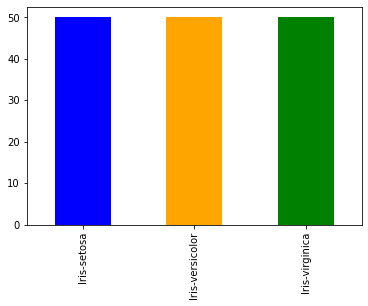

In [8]:
count_Class=pd.value_counts(dat["Species"], sort= True)
print(count_Class)
count_Class.plot(kind= 'bar', color= ["blue", "orange", "green"])
# plt.title('Bar chart')
plt.show()

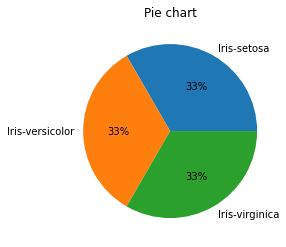

In [10]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [9]:
## Missing Data Checking:
pd.isnull(dat).any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

The result show that has no missing values and the dataset is balaced.

In [28]:
#Chuẩn hóa dữ liệu cột Amount, thêm cột scaled_Amount
from sklearn.preprocessing import StandardScaler
fetures = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
dat_scale = pd.DataFrame(StandardScaler().fit_transform(dat[fetures].values))

In [33]:
dat_scale.rename(columns={0: "SepalLengthCm", 1: "SepalWidthCm", 2: "PetalLengthCm", 3: "PetalWidthCm"})

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [39]:
#test train split time
from sklearn.model_selection import train_test_split
labels = dat['Species'].values # target
features = dat_scale.values # features
X_train, X_test, y_train, y_test = train_test_split(dat_scale, labels, test_size=0.2,
                                            random_state=1, stratify=labels)

print("Train Dataset: ", len(y_train), "\nTest Dataset :  ", len(y_test))

Train Dataset:  120 
Test Dataset :   30


###  Classification with GaussianNB Model

In [40]:
## 
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
# fit it to training data
model.fit(X_train,y_train)
model

GaussianNB()

#### Prediction

In [43]:
# predict using test data
y_pred = model.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor']


In [44]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = model.predict_proba(X_test)
print(y_pred_prob)

[[3.15923295e-233 2.88633615e-007 9.99999711e-001]
 [1.00000000e+000 6.36418205e-020 1.46133651e-025]
 [1.10742309e-035 9.99999815e-001 1.84533301e-007]
 [1.00000000e+000 2.85960633e-019 5.08807131e-025]
 [1.00000000e+000 4.08487522e-011 1.37744907e-017]
 [1.00000000e+000 1.69003592e-020 6.31398590e-026]
 [3.56794911e-228 1.96023993e-007 9.99999804e-001]
 [3.44998577e-181 3.03181699e-003 9.96968183e-001]
 [1.93865592e-168 2.91504094e-002 9.70849591e-001]
 [5.87125061e-118 9.14394811e-001 8.56051886e-002]
 [1.00000000e+000 1.38559777e-018 8.43339205e-024]
 [5.36119723e-077 9.99982471e-001 1.75289169e-005]
 [2.48549577e-214 3.44922766e-006 9.99996551e-001]
 [7.40347328e-062 9.99992692e-001 7.30762478e-006]
 [8.39681578e-174 2.30014924e-002 9.76998508e-001]
 [1.00000000e+000 1.80932901e-018 1.10302647e-022]
 [2.50579885e-238 6.64231013e-008 9.99999934e-001]
 [5.75184031e-078 9.99875802e-001 1.24197848e-004]
 [8.84632729e-038 9.99999826e-001 1.74397898e-007]
 [1.73359791e-150 1.68582429e-0

### Evaluation

In [57]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score
print('Confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("Accuracy: ", accuracy_score(y_test,y_pred))

Confusion matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Accuracy:  0.9666666666666667
